In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#creating a dataframe with the data and looking at the first 5 rows
df = pd.read_csv('data2/telco_churn.csv')
df.head(5)

#looking at shape of dataset it is 100,000 rows by 100 columns
df.shape

#describing the dataset 
df.describe()

#type of data in each column 
df.info()

#dropping Customer ID as it will not determine the probability of a customer churning
df.drop('Customer_ID', axis = 1, inplace = True)
df.info()


#seperating into 3 groups: float, int and object for visualization
df_categorical = [col for col in df.columns if df[col].dtype == 'object']
df_integer = [col for col in df.columns if df[col].dtype == 'int64']
df_float = [col for col in df.columns if df[col].dtype == 'float64']  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [2]:
# Checking for null entries
print(df.isnull().sum())

#columns with missing values 
null_val = df.isnull().sum().sort_values(ascending = False).head(11)
percent = (null_val/len(df))*100




# Percentage of missing values
pd.DataFrame({'Number of missing values': null_val, 'Percentage of missing data': percent})


rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid6_10        1732
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Length: 99, dtype: int64


,Number of missing values,Percentage of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


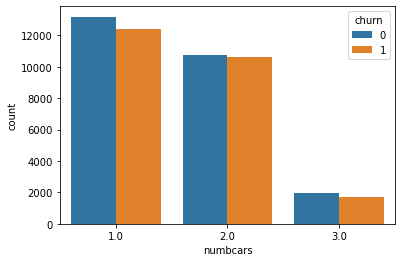

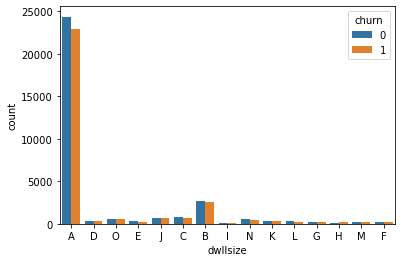

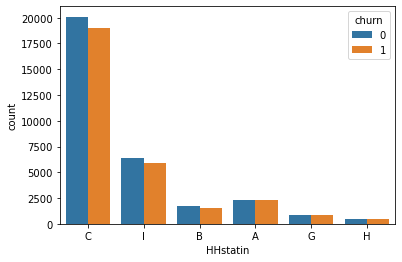

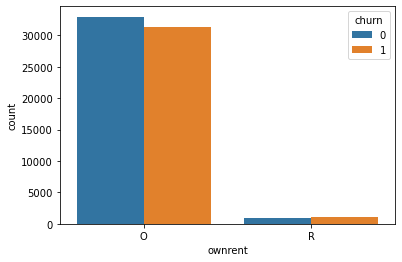

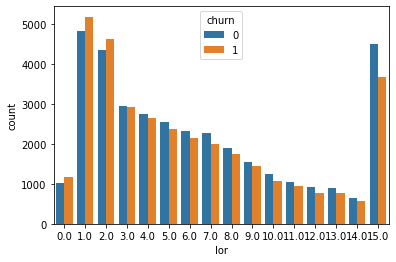

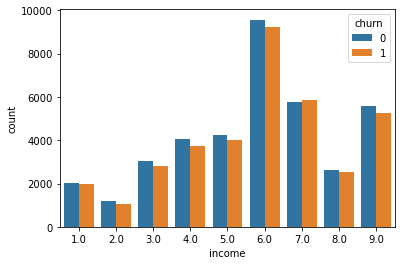

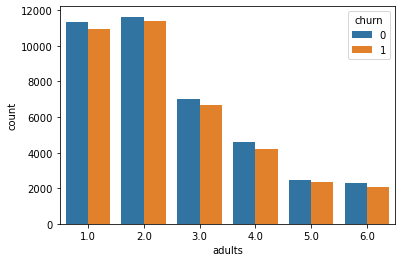

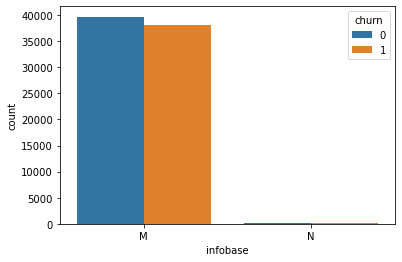

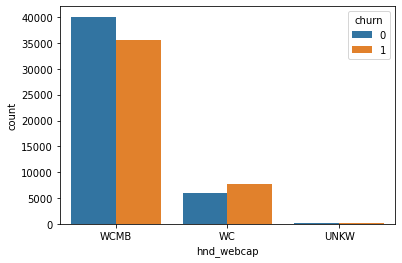

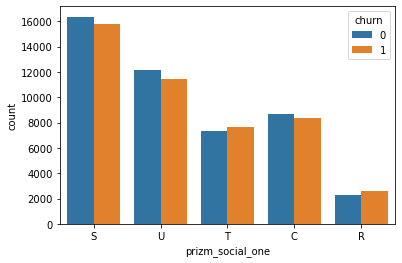

churn,0,1
prizm_social_one,,
C,0.509226,0.490774
R,0.472932,0.527068
S,0.509238,0.490762
T,0.491627,0.508373
U,0.515182,0.484818


In [3]:
#visualizing the features with the most missing values against the churn 
sns.countplot(x= "numbcars", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('numbcars')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "dwllsize", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwllsize')["churn"].value_counts(normalize=True).unstack(fill_value=0)


sns.countplot(x= "HHstatin", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('HHstatin')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "ownrent", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ownrent')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "lor", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('lor')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "income", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('income')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "adults", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('adults')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "infobase", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('infobase')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "hnd_webcap", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('hnd_webcap')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "prizm_social_one", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('prizm_social_one')["churn"].value_counts(normalize=True).unstack(fill_value=0)


<function matplotlib.pyplot.show(close=None, block=None)>

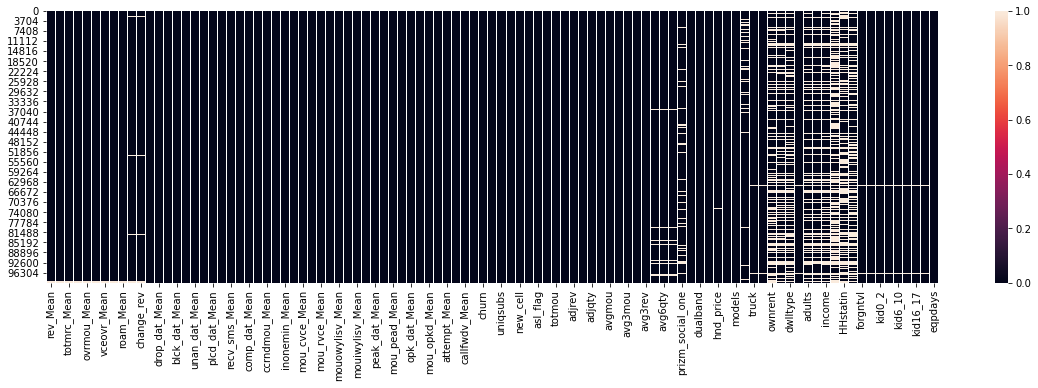

In [4]:
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull())
plt.show

In [5]:
df.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor',
         'income','adults','infobase','prizm_social_one',],axis=1,inplace=True)

In [6]:
df.shape

(100000, 89)

<ipython-input-7-e955d7b681fe>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)


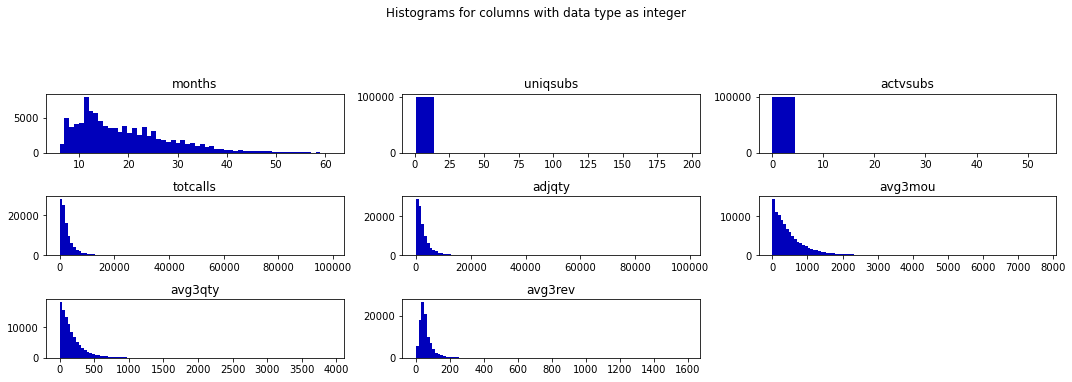

In [7]:
#plotting integer values into a histogram
int_hist = df[['months', 'uniqsubs','actvsubs','totcalls','adjqty','avg3mou','avg3qty','avg3rev']]

fig1 = plt.figure(1, figsize=(15, 10))
plt.suptitle('Histograms for columns with data type as integer\n')

for i in range(int_hist.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(int_hist.columns.values[i])
    vals = np.size(int_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(int_hist.iloc[:, i], bins=vals, color = '#0000BB')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  

fig1 = plt.figure(1, figsize=(15, 10))
plt.suptitle('Histograms for columns with data type as integer\n')

for i in range(int_hist.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(int_hist.columns.values[i])
    vals = np.size(int_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(int_hist.iloc[:, i], bins=vals, color = '#0000BB')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])



In [8]:
def find_outliers(df,columns):
    outliers = []
    
    for i in columns:
        # upper limit 
        ucl_val = df[i].mean() + (3 * df[i].std())
        
        #lower limit 
        lcl_val = df[i].mean() - (3 * df[i].std())
        
        df[(df[i]>ucl_val) | (df[i]<lcl_val)][i]

    return outliers